<a href="https://colab.research.google.com/github/Melero09/Trabajo1erCuatrimestre/blob/main/Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir atleti
!mkdir madrid

mkdir: cannot create directory ‘atleti’: File exists
mkdir: cannot create directory ‘madrid’: File exists


In [ ]:
%cd atleti
!unzip atleti.zip
%cd ..

/content/atleti
Archive:  atleti.zip
  inflating: Aficionado2.jpg         
  inflating: Aficionado3.jpg         
  inflating: Aficionado4.jpg         
  inflating: Aficionado5.jpg         
  inflating: Aficionado6.jpg         
  inflating: Aficionado7.jpg         
  inflating: Aficionado8.jpg         
  inflating: Aficionado9.jpg         
  inflating: Aficionado10.jpg        
  inflating: Aficionado11.jpg        
  inflating: Aficionado12.jpg        
  inflating: Aficionado13.jpg        
  inflating: Aficionado14.jpg        
  inflating: Aficionado15.jpg        
  inflating: Aficionado16.jpg        
  inflating: Aficionado17.jpg        
  inflating: Aficionado18.jpg        
  inflating: Aficionado19.jpg        
  inflating: Aficionado20.jpg        
  inflating: Aficionado21.jpg        
  inflating: Aficionado22.jpg        
  inflating: Aficionado23.jpg        
  inflating: Aficionado24.jpg        
  inflating: Aficionado25.jpg        
  inflating: Aficionado26.jpg        
  inflating: 

In [ ]:
%cd madrid
!unzip madrid.zip
%cd ..

/content/madrid
Archive:  madrid.zip
  inflating: Madrid11.jpg            
  inflating: Madrid12.jpg            
  inflating: Madrid13.jpg            
  inflating: Madrid14.jpg            
  inflating: Madrid15.jpg            
  inflating: Madrid16.jpg            
  inflating: Madrid17.jpg            
  inflating: Madrid18.jpg            
  inflating: Madrid19.jpeg           
  inflating: Madrid20.jpg            
  inflating: Madrid21.jpg            
  inflating: Madrid22.jpg            
  inflating: Madrid23.jpg            
  inflating: Madrid24.jpg            
  inflating: Madrid25.jpg            
  inflating: Madrid1.jpg             
  inflating: Madrid2.jpeg            
  inflating: Madrid3.jpg             
  inflating: Madrid4.jpeg            
  inflating: Madrid5.jpg             
  inflating: Madrid6.jpg             
  inflating: Madrid7.jpg             
  inflating: Madrid8.jpg             
  inflating: Madrid9.jpg             
  inflating: Madrid10.jpg            
/content


In [ ]:
!rm -rf /content/atleti/atleti.zip
!rm -rf /content/madrid/madrid.zip

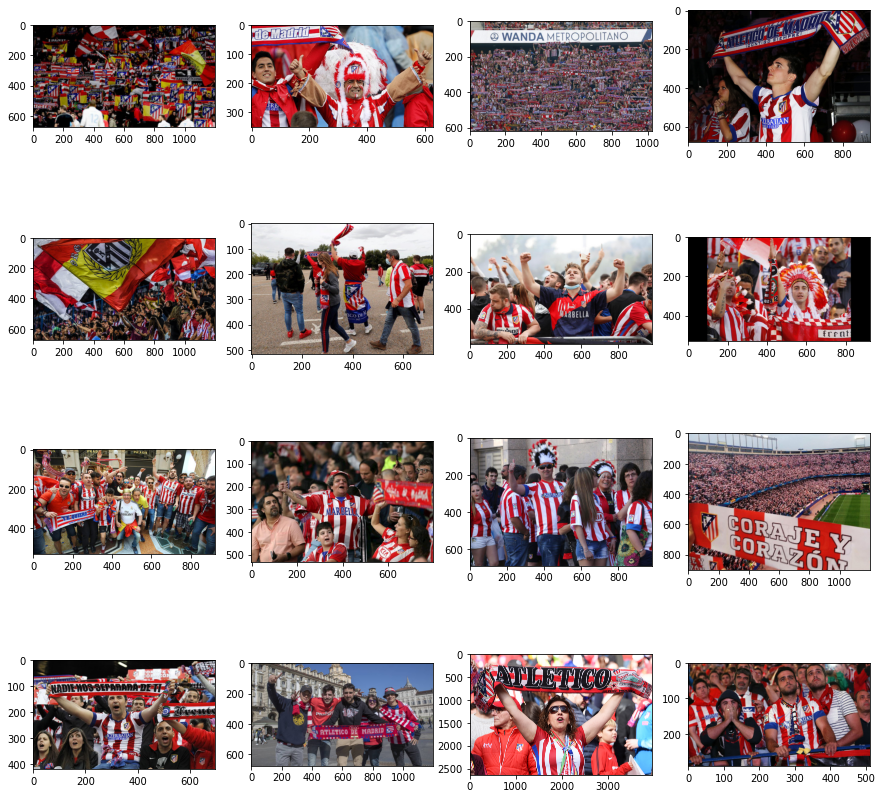

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/atleti'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:16]):
  plt.subplot(4,4,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

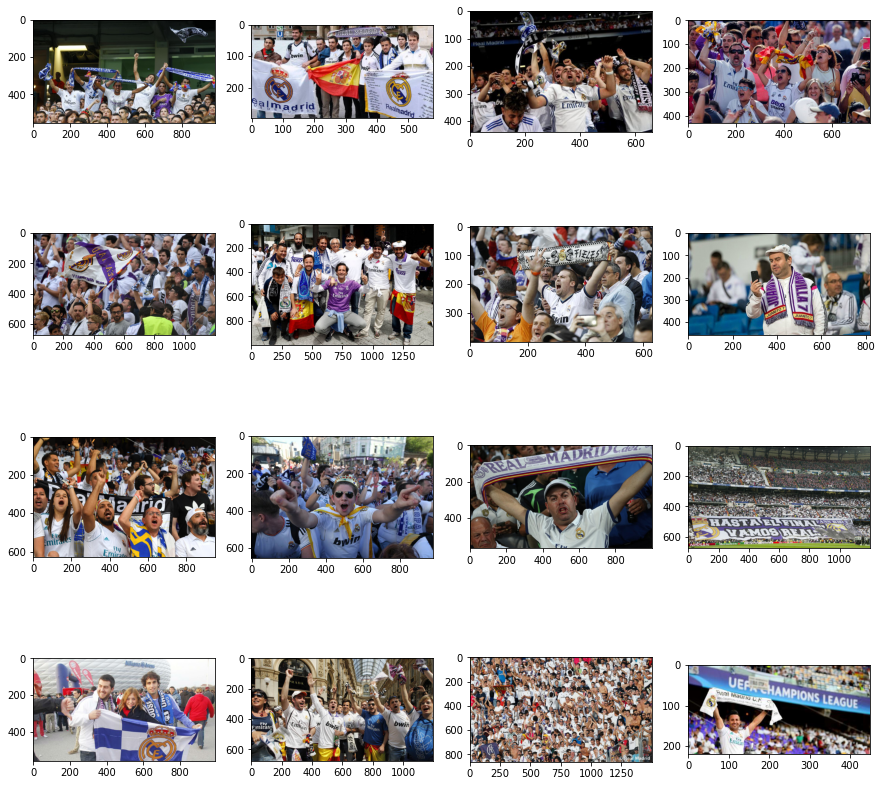

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/madrid'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:16]):
  plt.subplot(4,4,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
!mkdir dataset
!mkdir dataset/atleti
!mkdir dataset/madrid

In [ ]:
import shutil
carpeta_fuente = '/content/atleti'
carpeta_destino = '/content/dataset/atleti'

imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i < 25:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil
carpeta_fuente = '/content/madrid'
carpeta_destino = '/content/dataset/madrid'

imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
  if i < 25:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

Found 30 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


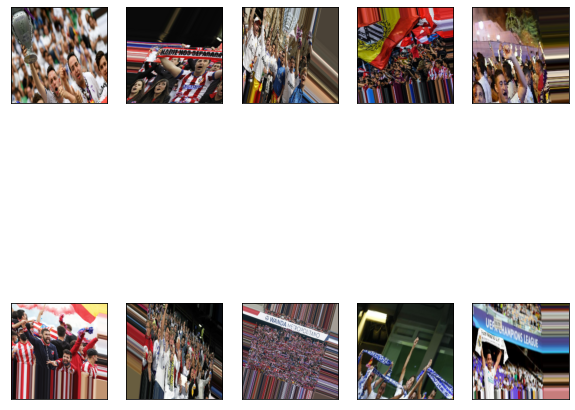

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.30,
    height_shift_range = 0.30,
    shear_range = 20,
    zoom_range = [0.5, 1.5],
    validation_split=0.4
)


data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224), batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224), batch_size=32, shuffle=True, subset='validation')


for imagen, etiqueta in data_gen_entrenamiento:
  plt.figure(figsize=(10,10))
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 0.9000
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9000
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9500
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.1219 - val_accuracy: 0.9500
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.0497 - accuracy: 0.9667 - val_loss: 0.2270 - val_accuracy: 0.9000
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9000
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.1739 - val_accuracy: 0.9000
Epoch 8/50
1/1 [=========================

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
url = 'https://oddslifenetstorage.blob.core.windows.net/insidersport/2021/05/shutterstock_1169950756.jpg'
prediccion = categorizar (url)
print(prediccion)
#0 -> Atleti
#1 -> Madrid

1
